In [1]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
#import gp
#importlib.reload(gp)

import pandas as pd


from gp_fijando_operaciones import *

In [2]:

csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


**Parámetros**

In [3]:
funcdict = {
        'add' : 5,
        'sub' : 5,
        'mul' : 4,
        'div' : 4,
        'inv' : 3,
        'log' : 3,
        'max' : 1,
        'min' : 1,
        'sqrt' : 4,
        'exp' : 4,
        'floor': 1
}

gp_fijando_operaciones = GP(M=500,
							max_depth=15,
							prob_node_symb=0.5,
							func_list=list(funcdict.keys()),
                                                        prob_func=list(funcdict.values()),
							depth_penalty=0.005,
							const_range=(0,2) )
res = gp_fijando_operaciones.execute(x,y, generations=100)
res

/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:39: RuntimeWarning: overflow encountered in exp
  return np.where(np.abs(x1) > INV_THRESHOLD, np.exp(np.abs(x1)), 0)
/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:20: RuntimeWarning: overflow encountered in multiply
  return self.operator(*args)
/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:35: RuntimeWarning: overflow encountered in divide
  return np.where(np.abs(x2) > INV_THRESHOLD, x1/x2, x1)
/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:20: RuntimeWarning: invalid value encountered in multiply
  return self.operator(*args)
Progress:   0%|          | 0/100 [00:00<?, ?it/s]



  div____________________
 /                       \
x               _________add________
               /                    \
      0.8427641798240499     0.9978960204589793

1
range(2, 2)


ValueError: The number of weights does not match the population

In [ ]:
gp_fijando_operaciones.pprint()

AttributeError: 'GP' object has no attribute 'pprint'

In [ ]:
gp_fijando_operaciones.probs_tree_op

[0.9, 0.01, 0.01, 0.07999999999999996]

**Mejor fitness con y sin penalización**

In [ ]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness penalizado:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	2.5295187967213653
best fitness penalizado:	2.6019205742199136


In [ ]:
#(res["best_trees"][0]).pprint()

**Ecuación**

In [ ]:
print(res['best_trees'][-1])

div(sub(sub(inv(x),add(log(x),log(x))),sub(log(x),x)),log(mul(sub(sqrt(x),add(log(x),x)),sqrt(0.11643275758098404))))


**Gráfica árbol**

In [ ]:
(res["best_trees"][-1]).pprint()


                             _____________div_____________________________________________________
                            /                                                                     \
         _________________sub_______                                    __________________________log
        /                           \                                  /
     _sub_______                   _sub                 _____________mul_____________________
    /           \                 /    \               /                                     \
  inv          _add___          log     x          __sub_______                     _________sqrt
 /            /       \        /                  /            \                   /
x           log       log     x                 sqrt          _add       0.11643275758098404
           /         /                         /             /    \
          x         x                         x            log     x
                       

**Gráficos**

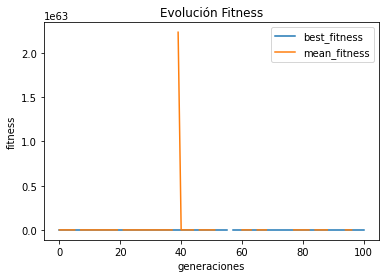

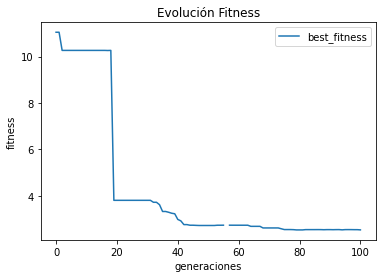

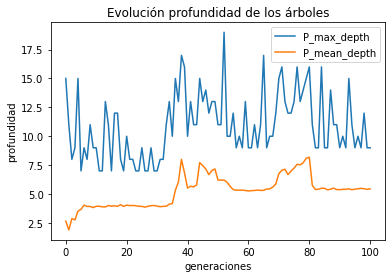

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.title("Evolución profundidad de los árboles")
plt.ylabel('profundidad')
plt.xlabel('generaciones')
plt.legend()